In [1]:
using CairoMakie
using DataFrames
using FITSIO
using LaTeXStrings
using Printf
using Statistics

In [2]:
function plot_random_lightcurve(; qtrs = 1:17, rescale_lc = true)
    q = rand(qtrs)
    fitsdir = joinpath(@__DIR__, "..", "lc-files", "HLSP", @sprintf("Q%02d", q), "detrended_5_cbvs")
    files = readdir(fitsdir)
    detrend_files = filter(f -> endswith(f, "_detrended.fits"), files)
    f = rand(detrend_files)

    fitsdir2 = joinpath(@__DIR__, "..", "lc-files", "HLSP", @sprintf("Q%02d", q), "detrended_variable_cbvs")
    fitsdir3 = joinpath(@__DIR__, "..", "lc-files", "HLSP", @sprintf("Q%02d", q), "detrended_10_cbvs")

    lc = DataFrame(FITS(joinpath(fitsdir, f), "r")[2])
    lc2 = DataFrame(FITS(joinpath(fitsdir2, f), "r")[2])
    lc3 = DataFrame(FITS(joinpath(fitsdir3, f), "r")[2])

    if rescale_lc
        flux_mean = mean(lc[!, :FLUX_DETREND])
        flux = lc[!, :FLUX_DETREND] ./ flux_mean
        flux_err = lc[!, :FLUX_DETREND_ERR_EST] ./ flux_mean

        flux_2_mean = mean(lc2[!, :FLUX_DETREND])
        flux2 = lc2[!, :FLUX_DETREND] ./ flux_2_mean
        flux2_err = lc2[!, :FLUX_DETREND_ERR_EST] ./ flux_2_mean

        flux_3_mean = mean(lc3[!, :FLUX_DETREND])
        flux3 = lc3[!, :FLUX_DETREND] ./ flux_3_mean
        flux3_err = lc3[!, :FLUX_DETREND_ERR_EST] ./ flux_3_mean
    else
        flux = lc[!, :FLUX_DETREND]
        flux_err = lc[!, :FLUX_DETREND_ERR_EST]

        flux2 = lc2[!, :FLUX_DETREND]
        flux2_err = lc2[!, :FLUX_DETREND_ERR_EST]

        flux3 = lc3[!, :FLUX_DETREND]
        flux3_err = lc3[!, :FLUX_DETREND_ERR_EST]
    end

    if rescale_lc 
        ylab = "Relative flux"
    else
        ylab = L"f / \mathrm{e}^{-} \, \mathrm{s}^{-1}"
    end

    fig = Figure(size=(1600,400))
    a = Axis(fig[1, 1], title=f, xlabel=L"t / \mathrm{d}", ylabel=ylab)
    
    errorbars!(a, lc[!, :TIME], flux, flux_err, label="5 CBVs", color=Makie.wong_colors(0.25)[1])
    errorbars!(a, lc3[!, :TIME], flux3, flux3_err, label="10 CBVs", color=Makie.wong_colors(0.25)[3])
    errorbars!(a, lc2[!, :TIME], flux2, flux2_err, label="Variable CBVs", color=Makie.wong_colors(0.25)[2])

    axislegend(a)
    
    fig
end

plot_random_lightcurve (generic function with 1 method)

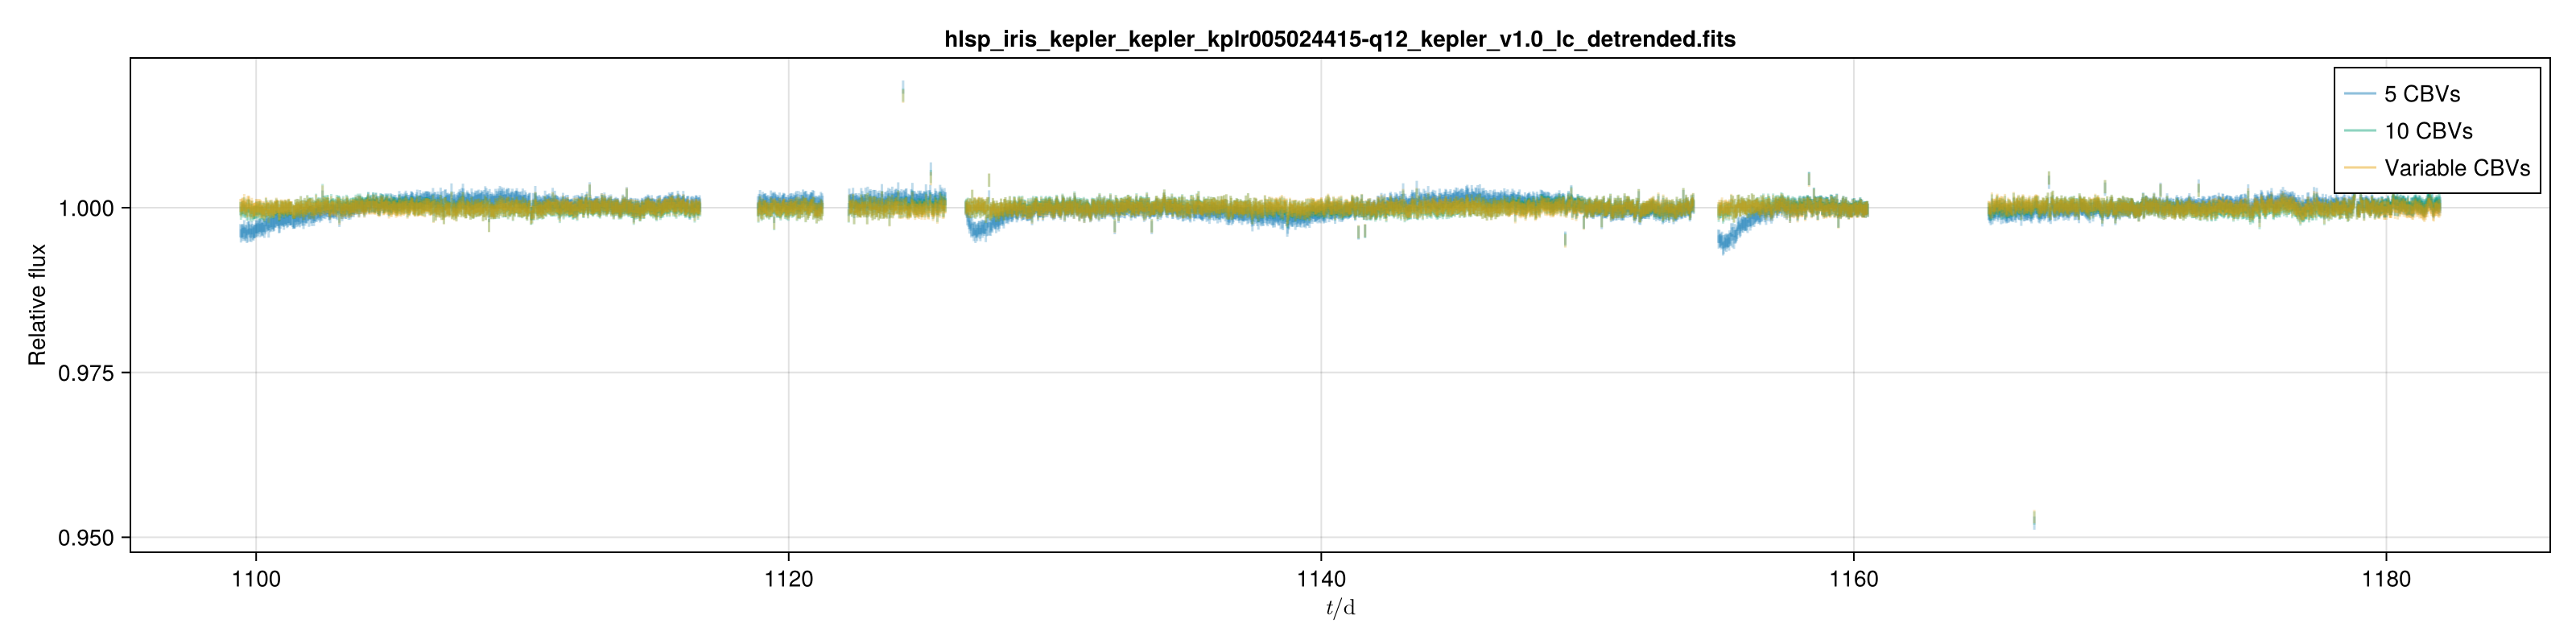

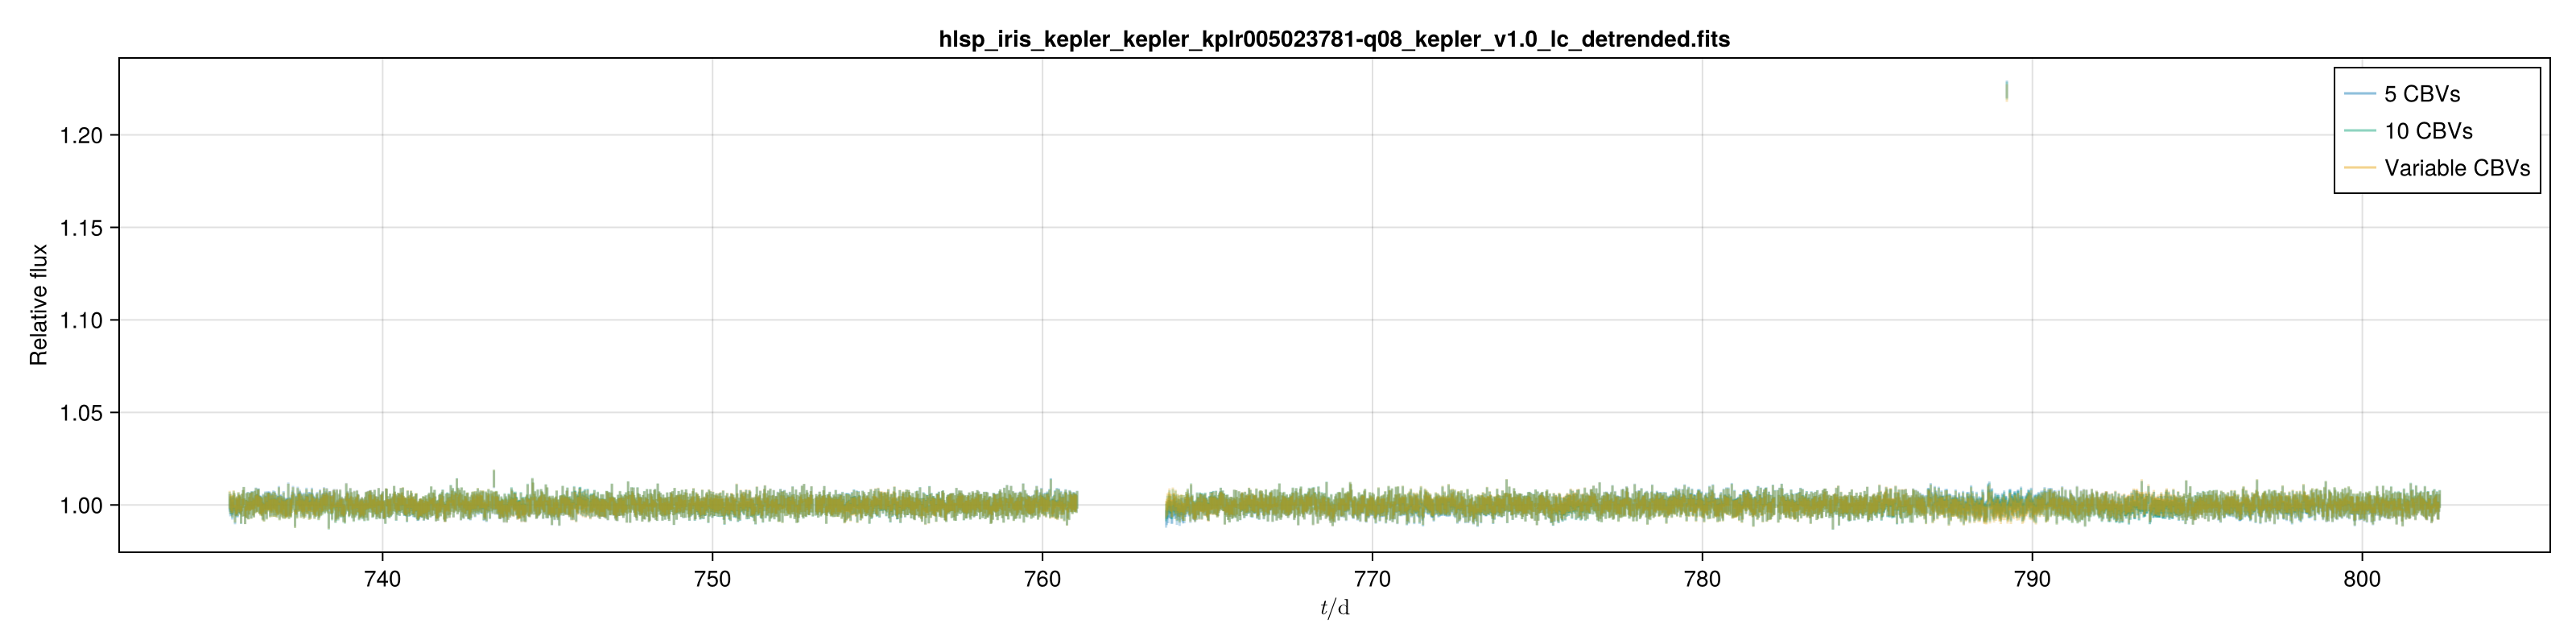

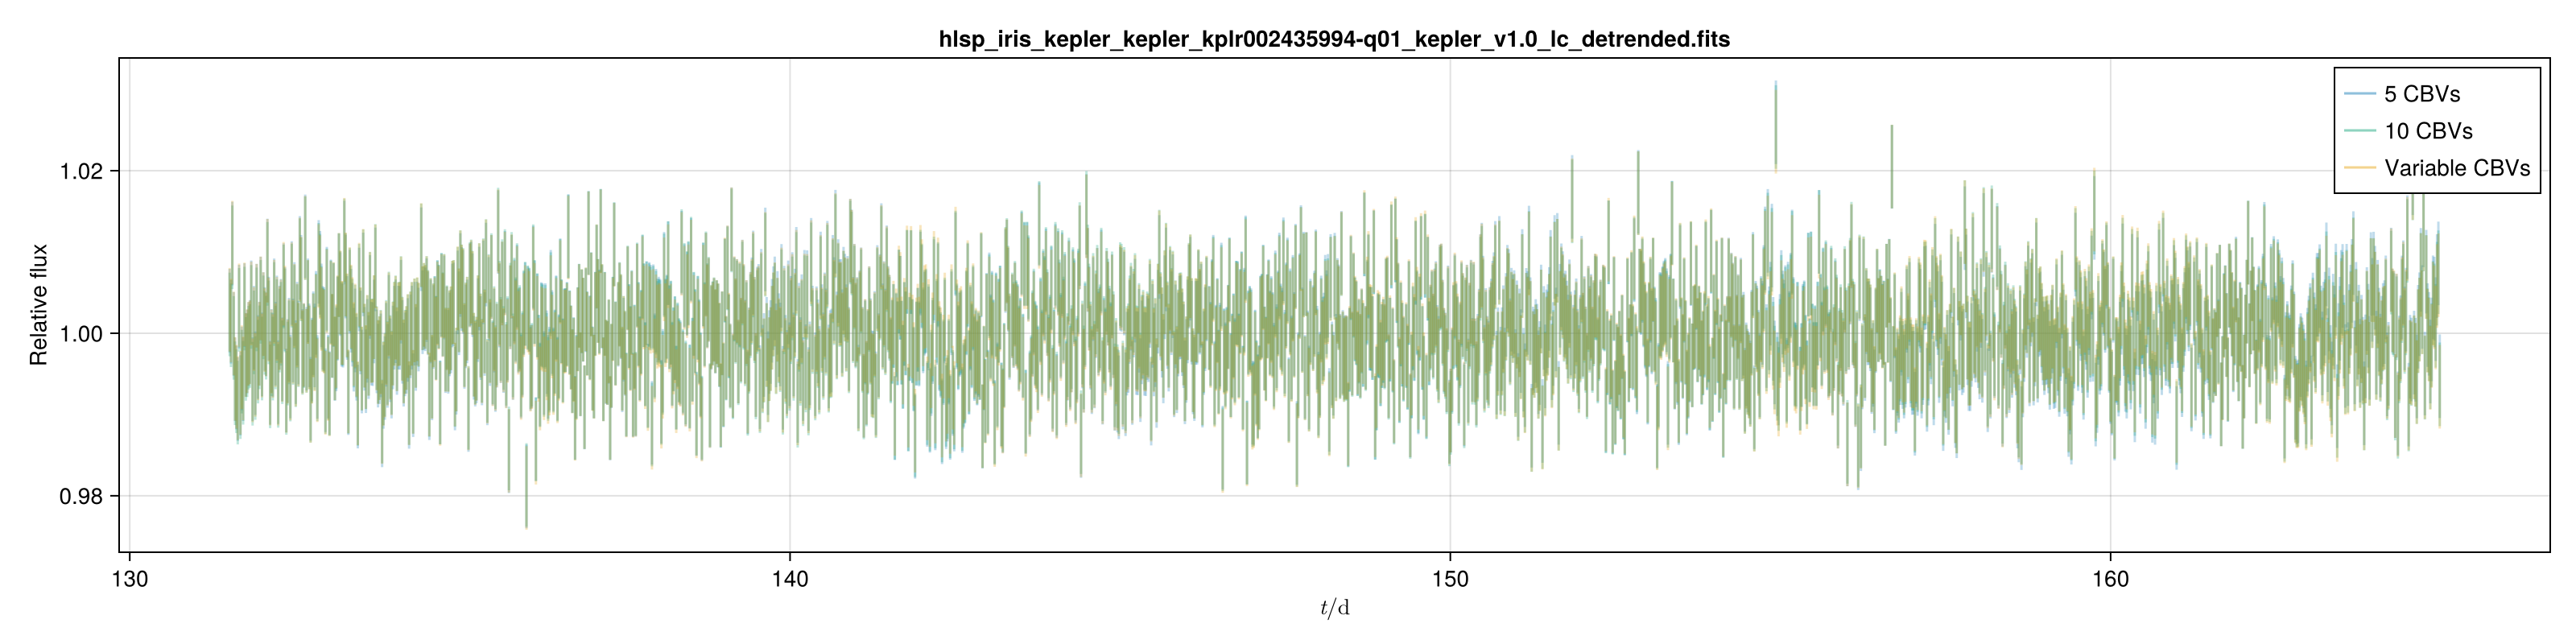

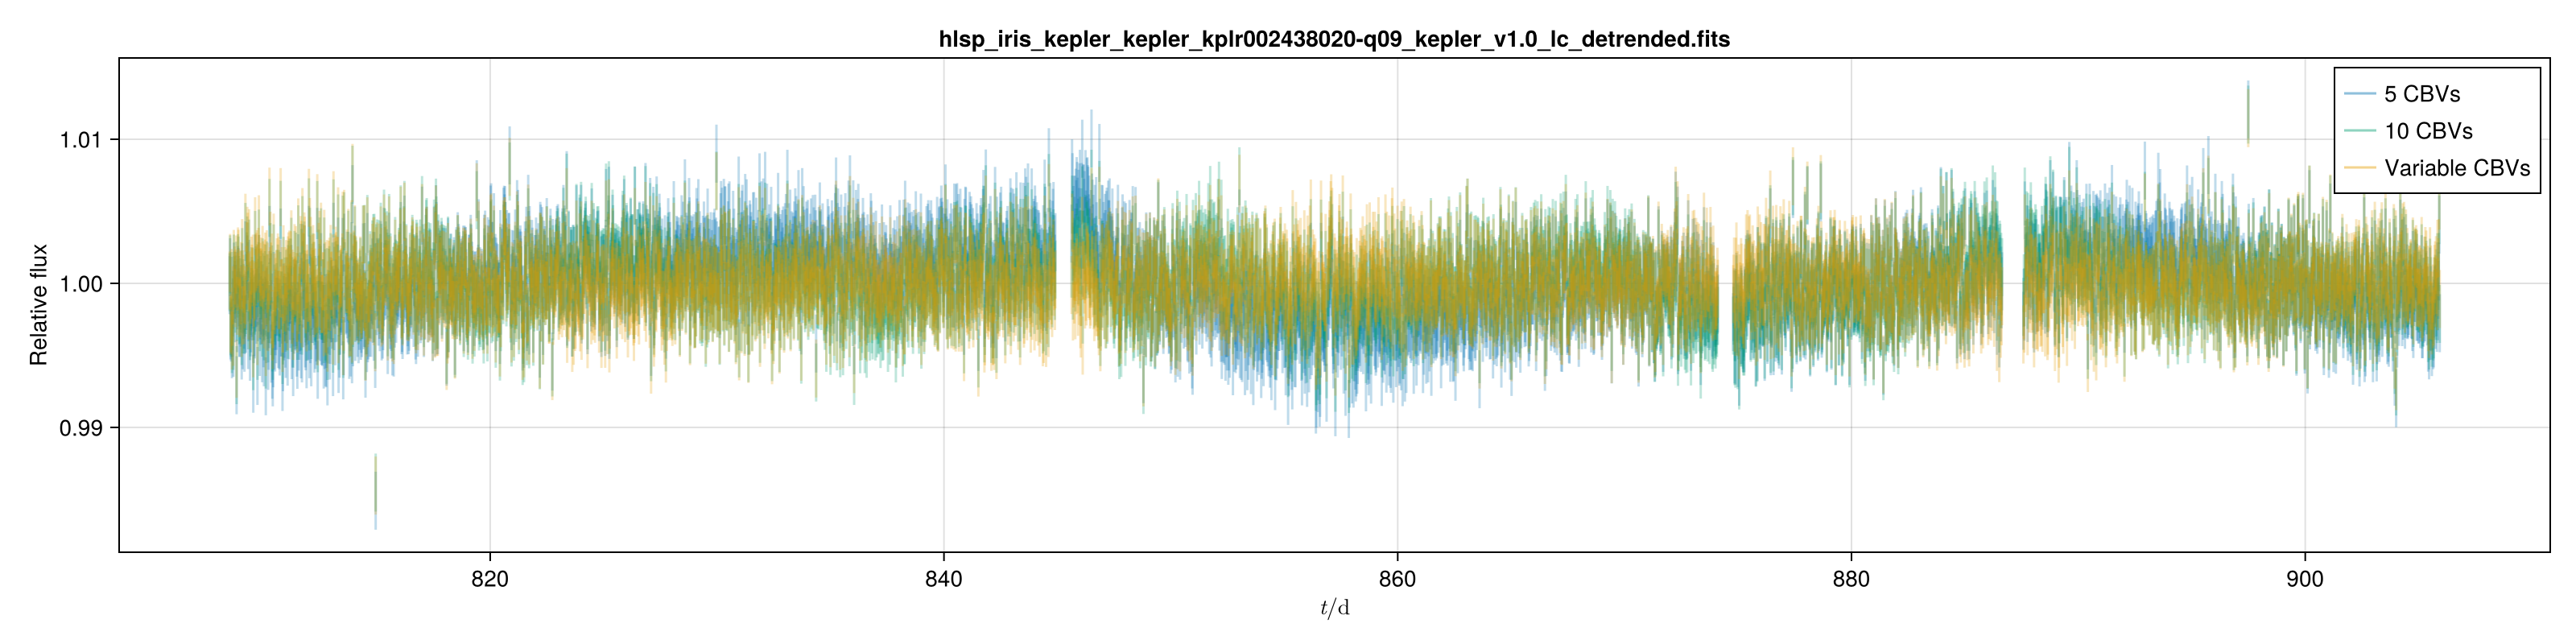

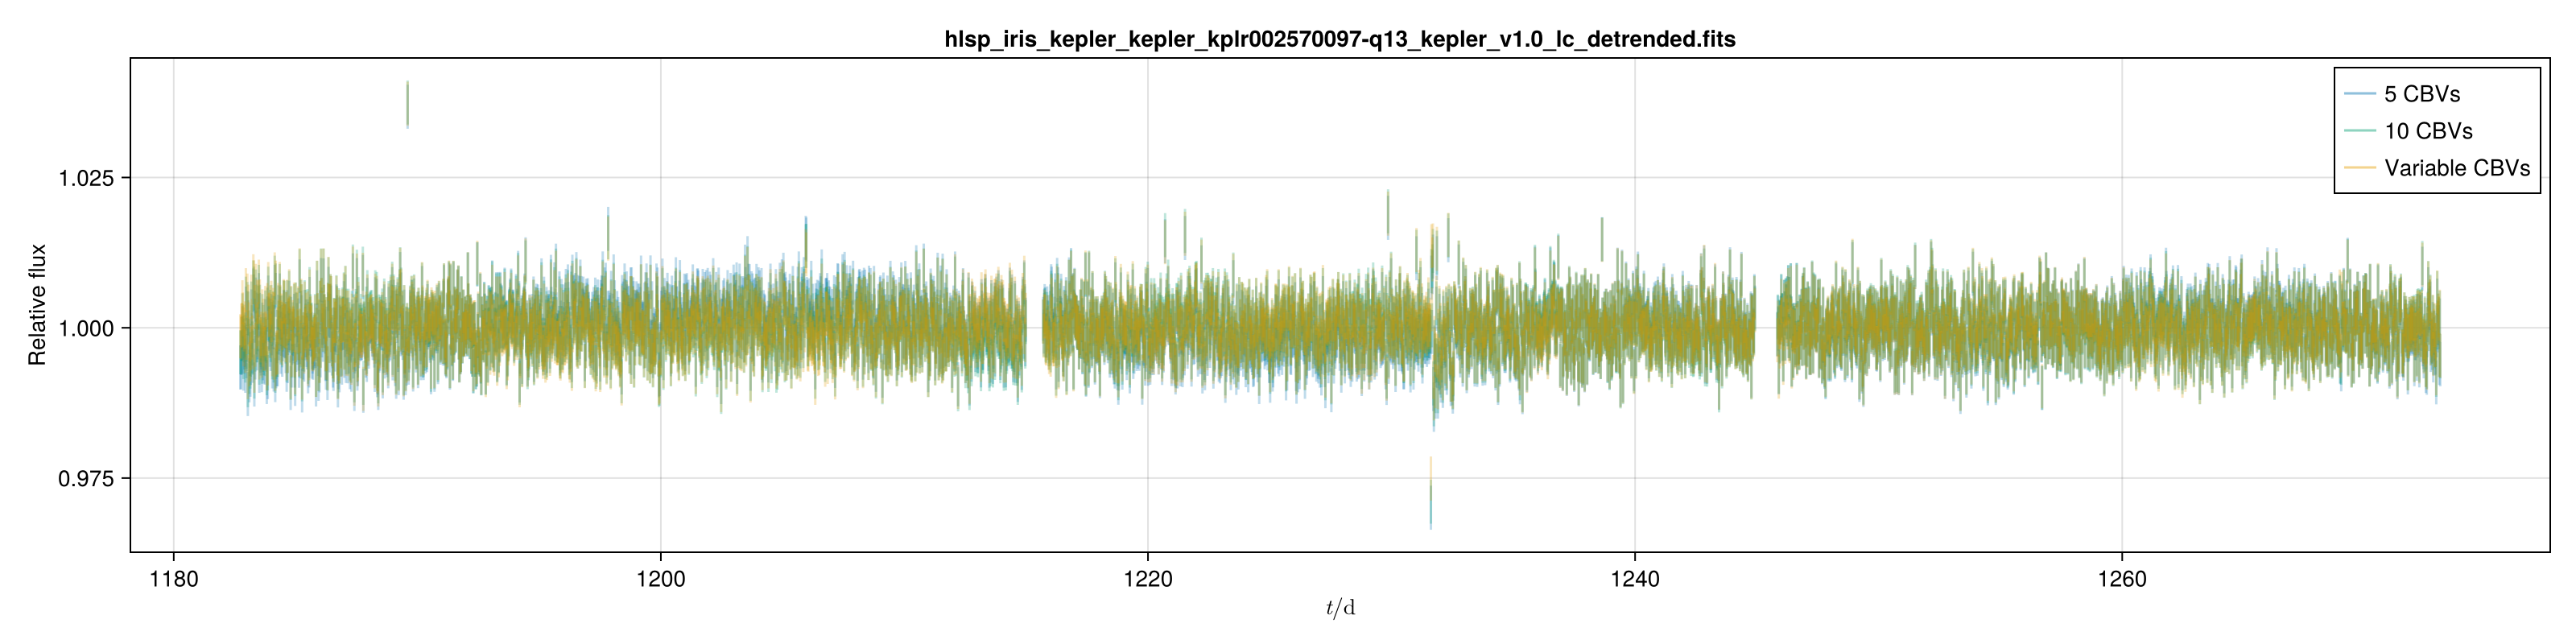

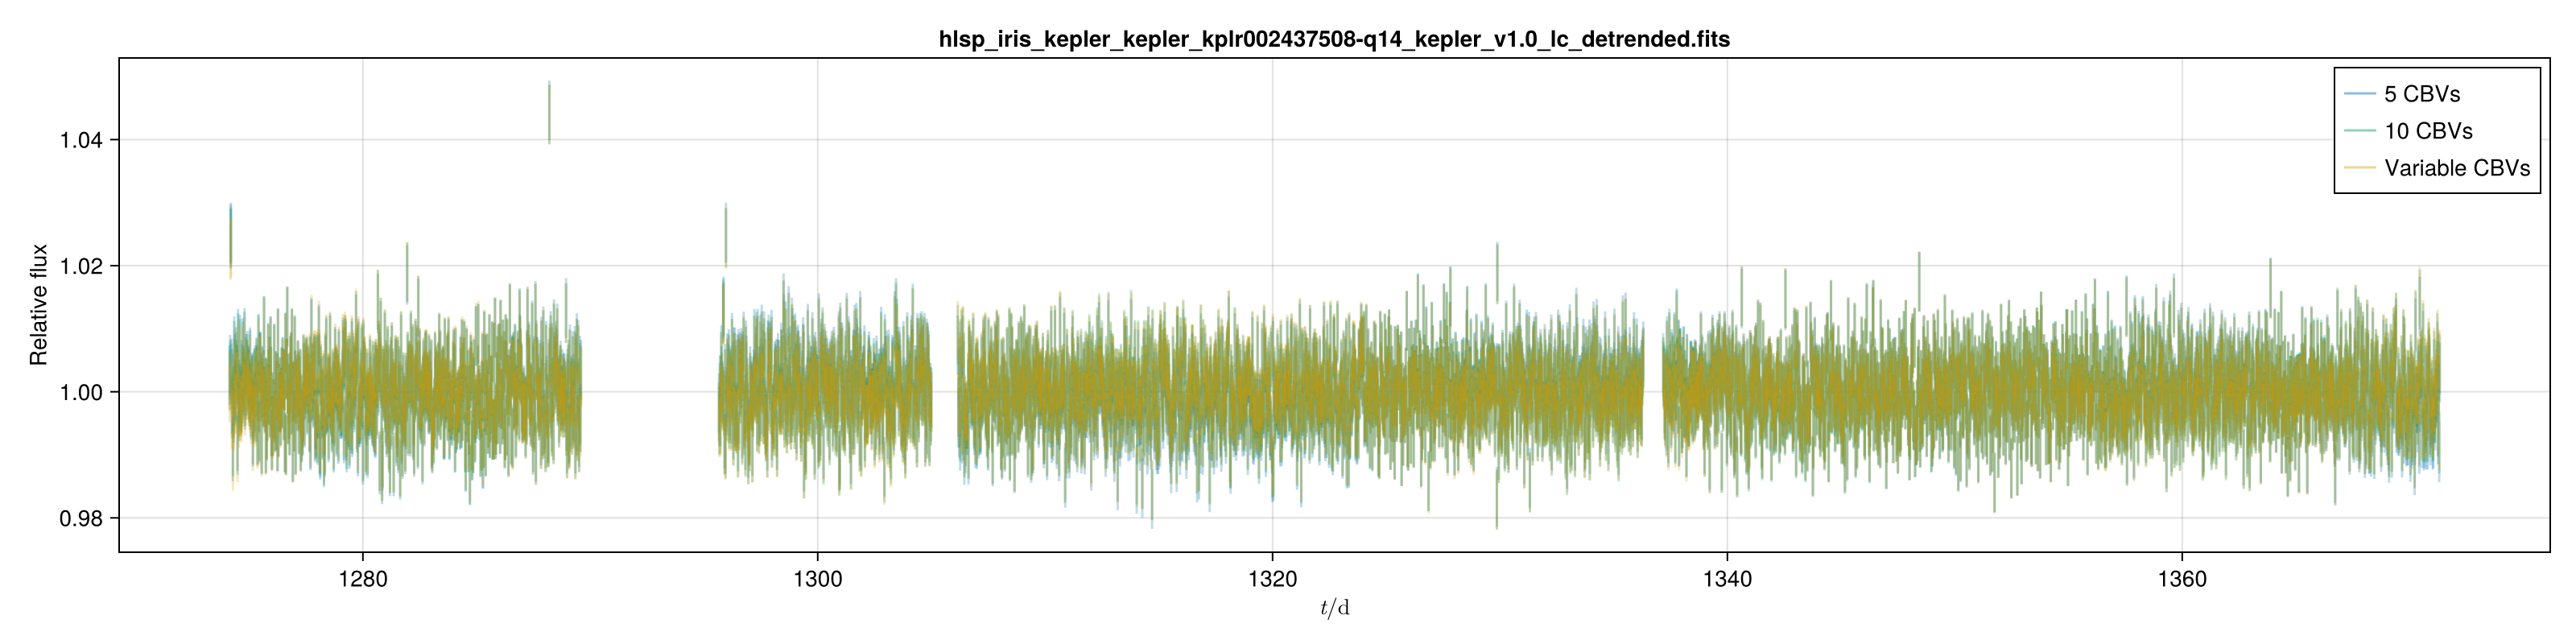

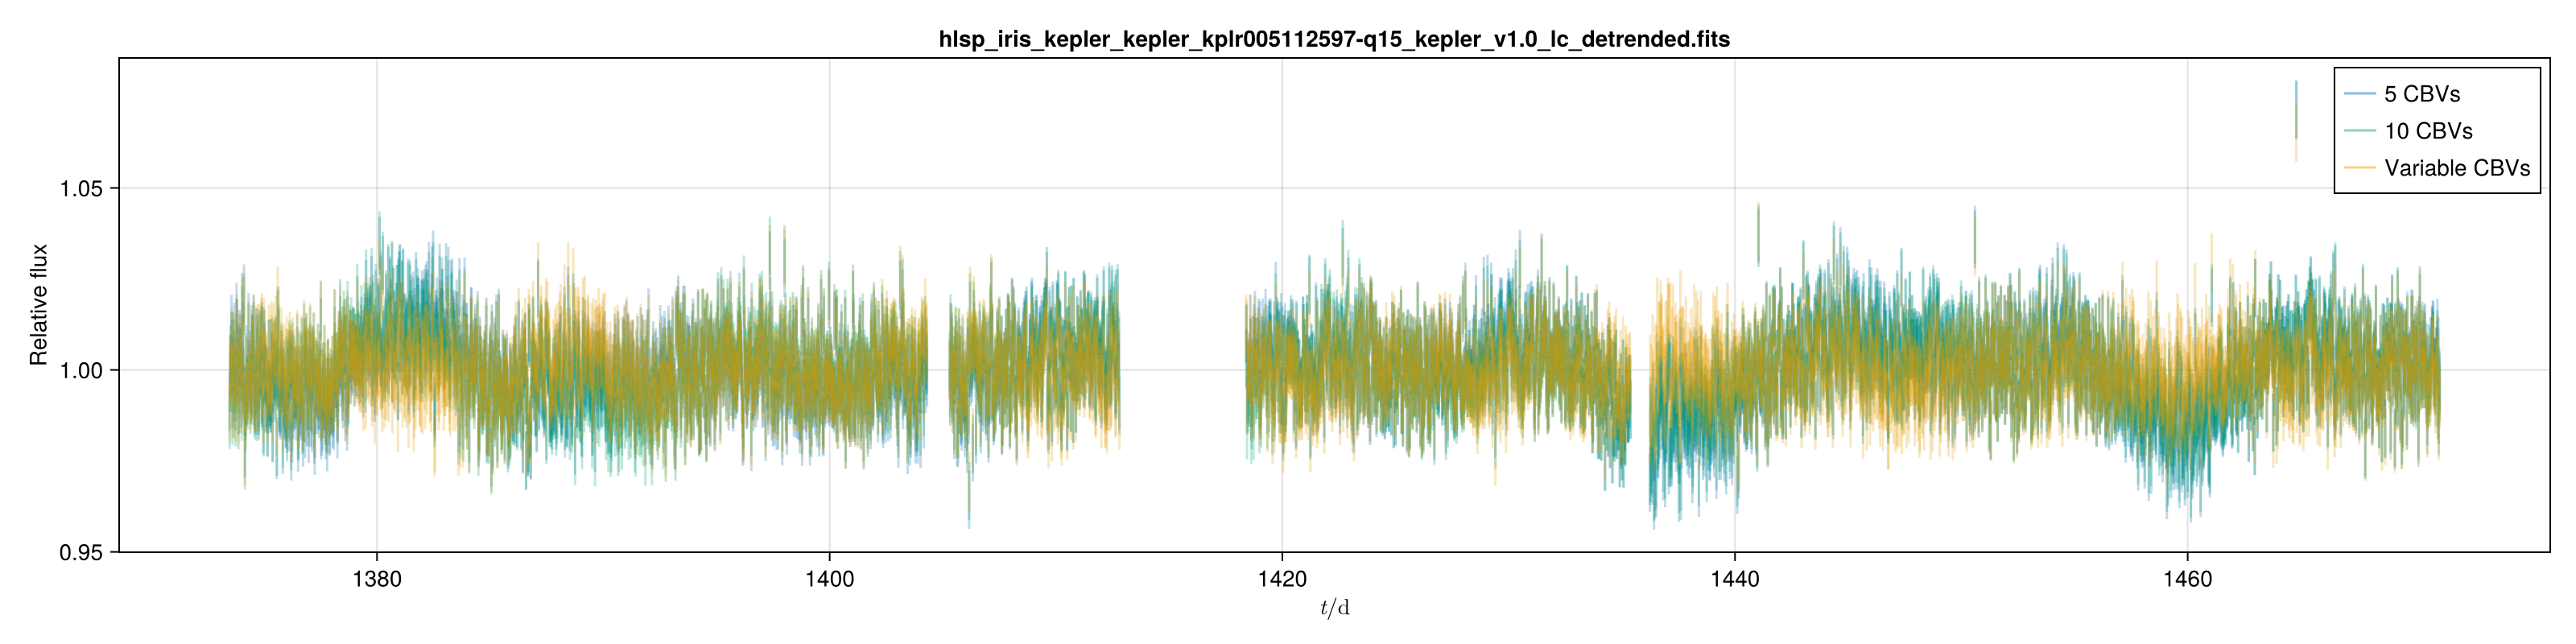

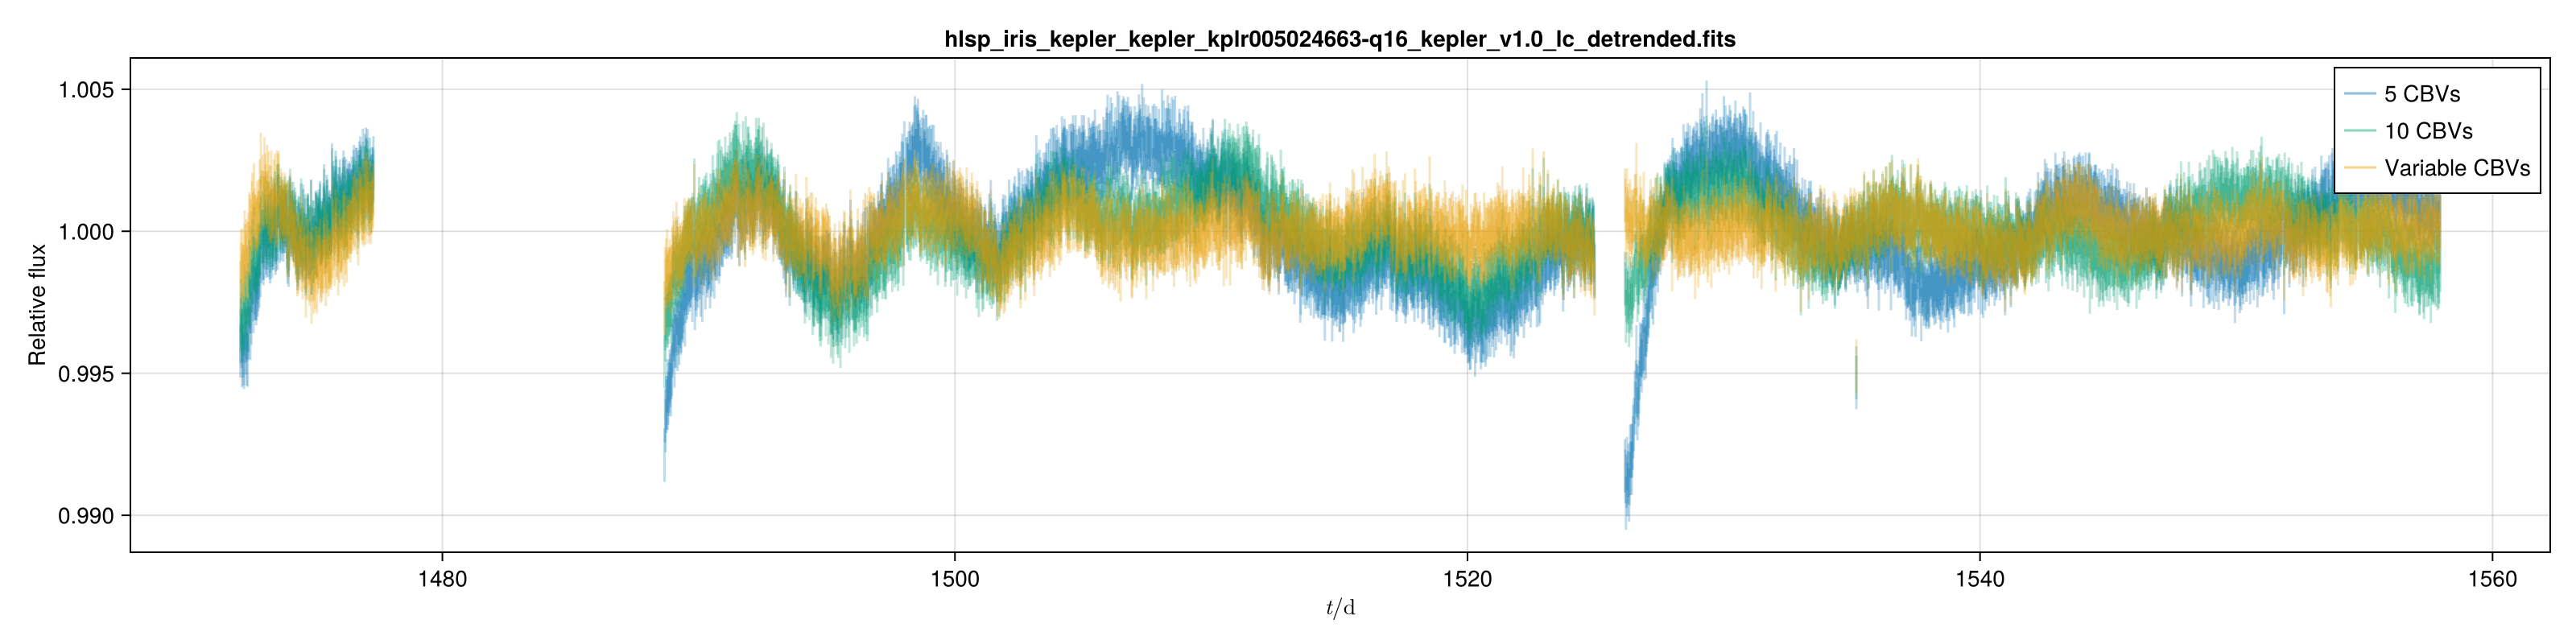

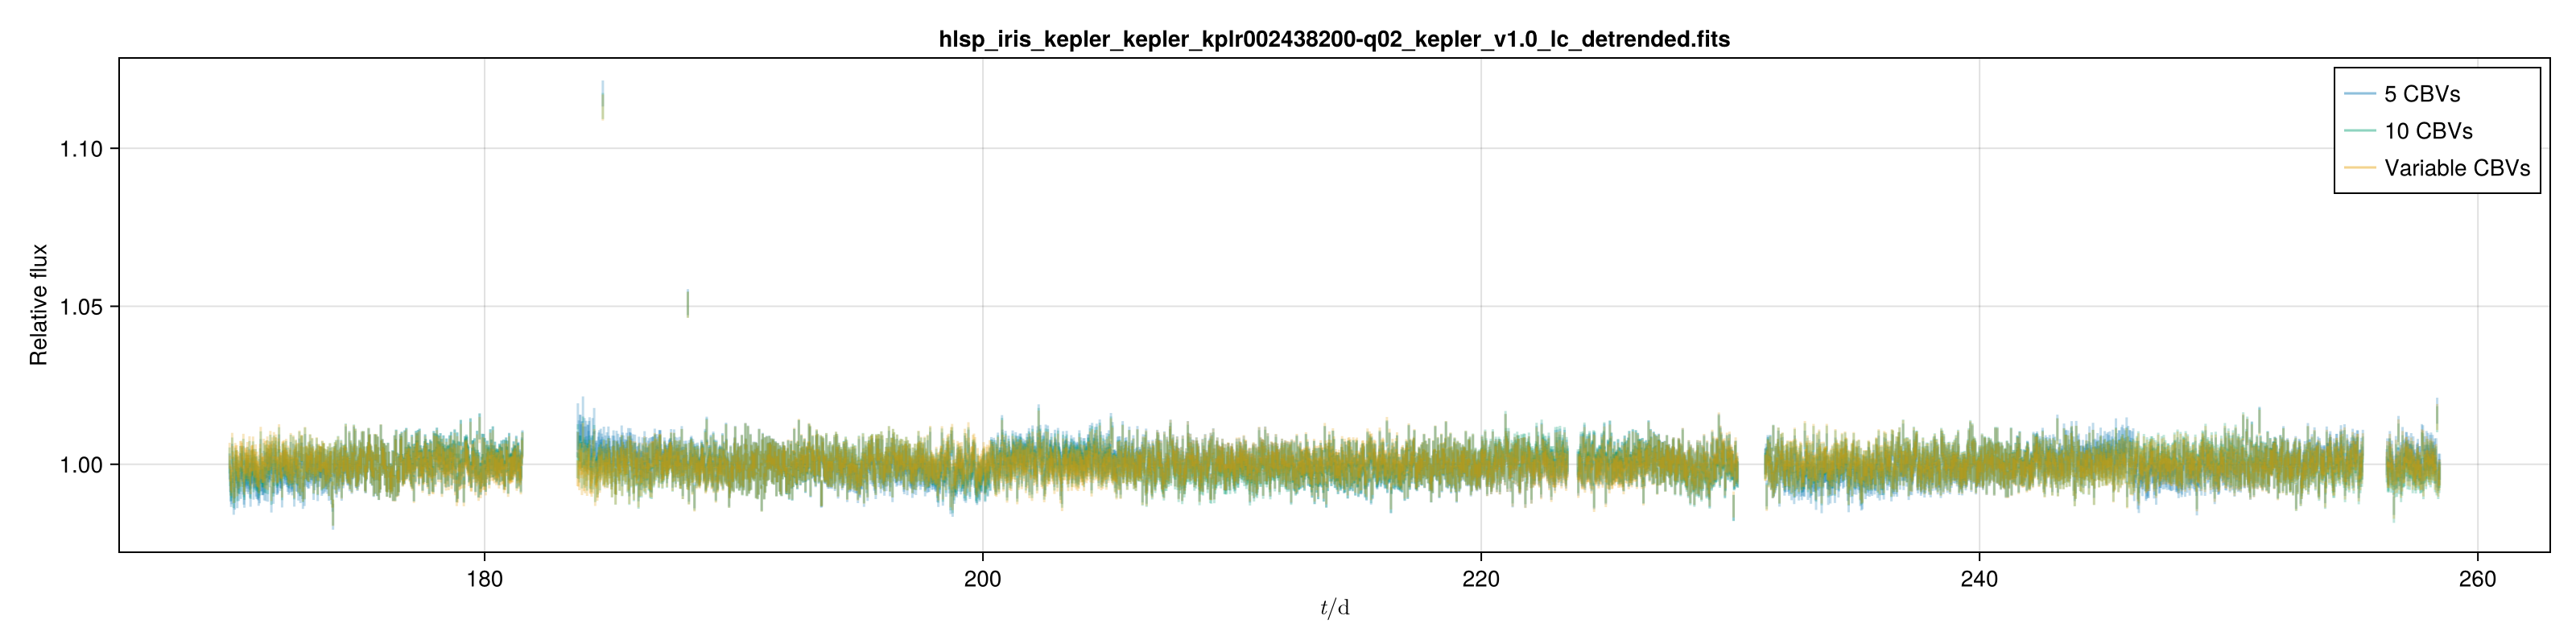

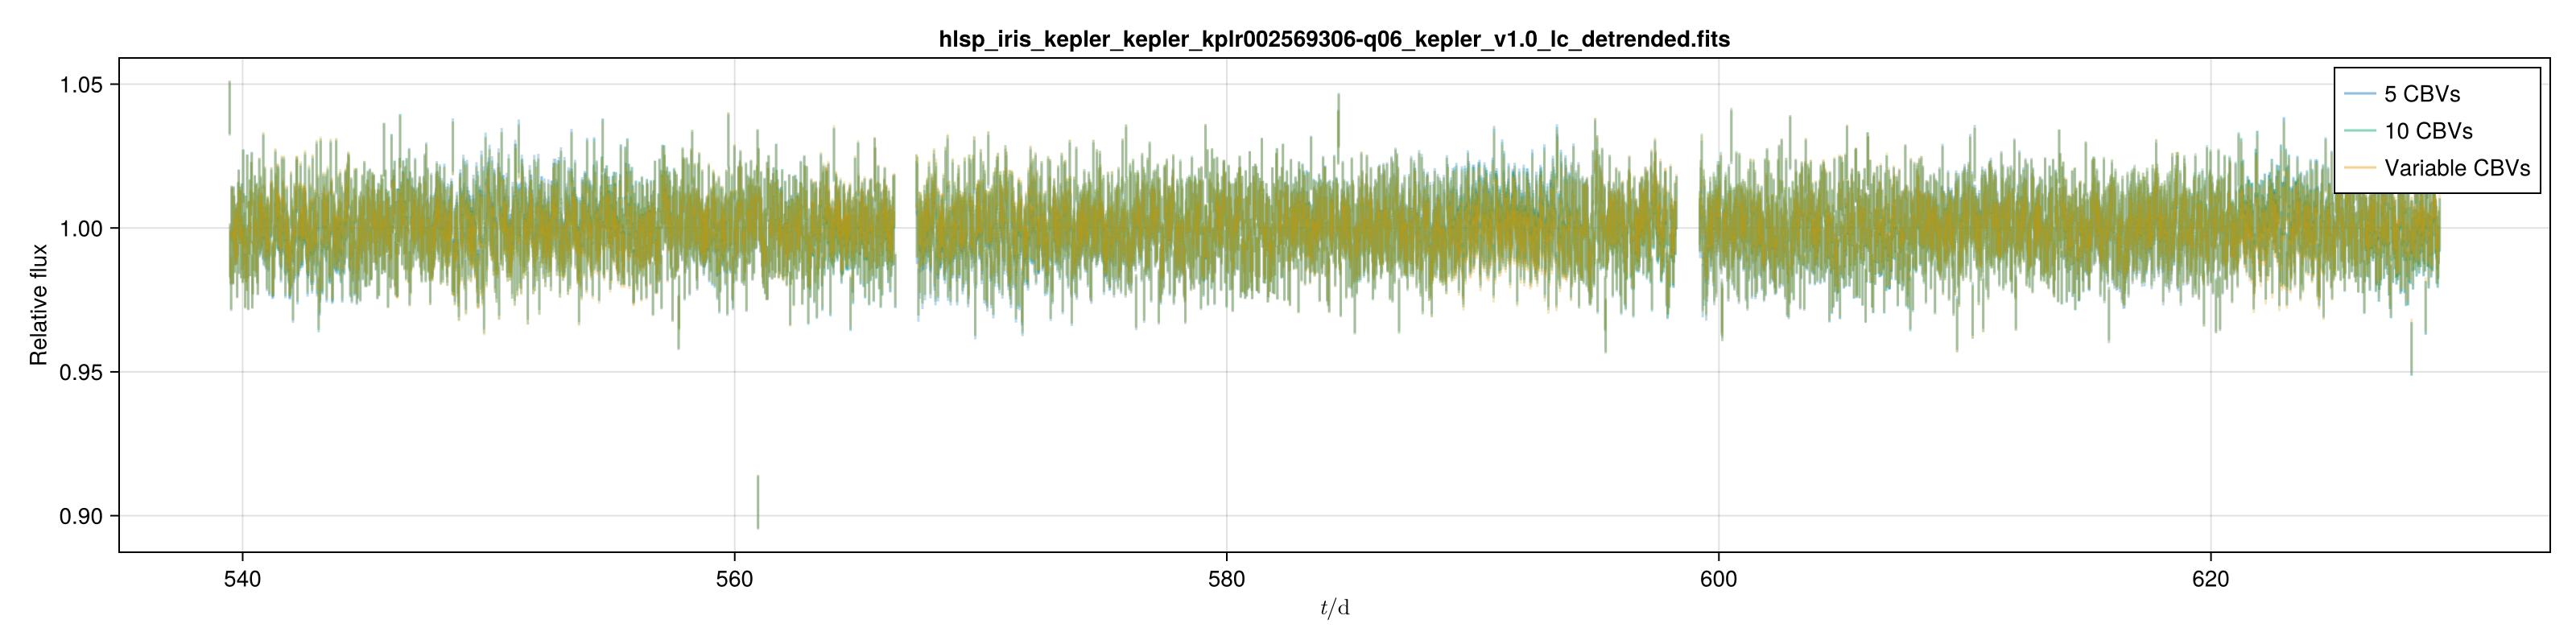

In [5]:
for i in 1:10
    p = plot_random_lightcurve()
    save(joinpath(@__DIR__, "..", "figures", "random_lightcurve_$(i).pdf"), p)
    display(p)
end